**Auteur : Agathe PASCAL**


Theoriquement 

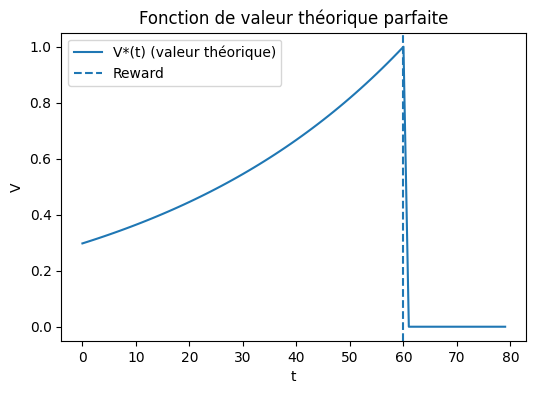

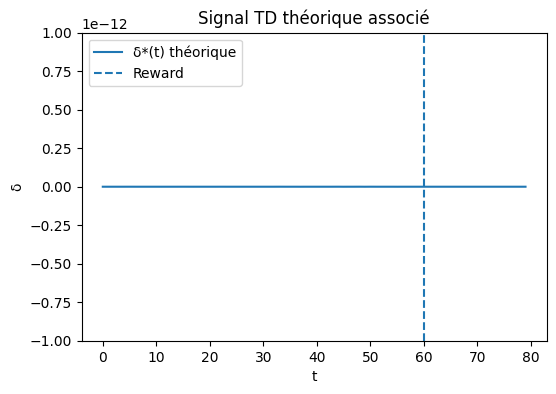

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres du problème ---
T = 80
reward_time = 60
gamma = 0.98
reward_value = 1.0

t = np.arange(T)

# --- Valeur théorique parfaite V*(t) ---
V_star = np.zeros(T)
for ti in range(T):
    if ti <= reward_time:
        V_star[ti] = reward_value * (gamma ** (reward_time - ti))
    else:
        V_star[ti] = 0.0

# --- Signal TD associé δ*(t) ---
# δ(t) = r(t) + γ V*(t+1) - V*(t)
delta_star = np.zeros(T)
r = np.zeros(T)
r[reward_time] = reward_value

for ti in range(T):
    V_tp1 = V_star[ti + 1] if ti + 1 < T else 0.0
    delta_star[ti] = r[ti] + gamma * V_tp1 - V_star[ti]

# --- Plot ---
plt.figure(figsize=(6,4))
plt.plot(t, V_star, label="V*(t) (valeur théorique)")
plt.axvline(reward_time, linestyle="--", label="Reward")
plt.xlabel("t")
plt.ylabel("V")
plt.title("Fonction de valeur théorique parfaite")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(t, delta_star, label="δ*(t) théorique")
plt.axvline(reward_time, linestyle="--", label="Reward")
plt.ylim(-1e-12, 1e-12)

plt.xlabel("t")
plt.ylabel("δ")
plt.title("Signal TD théorique associé")
plt.legend()
plt.show()
